<a href="https://colab.research.google.com/github/KopanoMonyai/My-Roadmap/blob/main/Estimating_Stock_Volatility_Using_Yang_Zhang_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:**

Volatility is important as it determines the risk an investor is taking when investing, it gives confidence to the investor, as many investors are already reluctant when it comes to option contracts due to the many unpredictable factors that affect the price. It is for this reason that the prediction of volatility plays a very important role in the pricing of option contracts. In this project, we will consider the Yang-Zhang volatility estimator to estimate the volatility of an underlying variable using Python.

Yang-Zhang volatility estimator is a drift-independent volatility estimator that combines the overnight volatility, the open-to-close volatility, and the
close-to-close volatility into one unbiased, efficient measure.

**1. Imported the relevant libraries.**

1. Pandas for data manipulation.
2. Numpy for the calculations.
3. Matplotlib for graphing and visualisation.
4. YFinance for data importation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

**2. Reading and viewing the structure of the data.**

1. Importing the AMD dataset and storing it as data frame(df).

In [ ]:
df = yf.download(tickers='AMD',start= "1980-01-01")

/tmp/ipython-input-496447581.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers='AMD',start= "1980-01-01")
[*********************100%***********************]  1 of 1 completed




2.   Used the head( ) function to view the first few rows.




In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AMD,AMD,AMD,AMD,AMD
Date,,,,,
1980-03-17,3.145833,3.302083,3.125000,3.125000,219600
1980-03-18,3.031250,3.125000,2.937500,3.125000,727200
1980-03-19,3.041667,3.083333,3.020833,3.031250,295200
1980-03-20,3.010417,3.062500,3.010417,3.041667,159600
1980-03-21,2.916667,3.020833,2.906250,3.010417,130800


### 3. Viewing the column names
1. To get a better idea of which columns I needed to subset.

In [ ]:
df.columns

MultiIndex([( 'Close', 'AMD'),
            (  'High', 'AMD'),
            (   'Low', 'AMD'),
            (  'Open', 'AMD'),
            ('Volume', 'AMD')],
           names=['Price', 'Ticker'])

**4. Modelling the Yang-Zhang volatility estimator**


In [ ]:
def yang_zhang_volatility(df, window):
    # Overnight (Close-to-Open) returns
    overnight_returns = np.log(df['Open'] / df['Close'].shift(1)).dropna()
    var_overnight = overnight_returns.var(ddof=1)

    # Intraday (Open-to-Close) returns
    intraday_returns = np.log(df['Close'] / df['Open']).dropna()
    var_intraday = intraday_returns.var(ddof=1)

    # Rogers-Satchell volatility
    log_hi_open = np.log(df['High'] / df['Open'])
    log_hi_close = np.log(df['High'] / df['Close'])
    log_lo_open = np.log(df['Low'] / df['Open'])
    log_lo_close = np.log(df['Low'] / df['Close'])
    rs_terms = log_hi_open * log_hi_close + log_lo_open * log_lo_close
    var_rs = rs_terms.mean()

    # Rolling window
    window = 10
    k = 0.34 / (1.34 + (window + 1) / (window - 1))

    sigma_oc = intraday_returns.rolling(window).var()
    sigma_co = overnight_returns.rolling(window).var()
    sigma_rs = rs_terms.rolling(window).mean()

    # Yang-Zhang variance
    yz_var = sigma_co + k * sigma_oc + (1 - k) * sigma_rs
    yz_vol = np.sqrt(yz_var)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, yz_vol, label="Yang-Zhang Volatility", color="blue")
    plt.title("Estimated Volatility Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volatility (Standard Deviation)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Yang-Zhang volatility
    yz_variance = var_overnight + k * var_intraday + (1 - k) * var_rs
    yz_volatility = np.sqrt(yz_variance)

    return yz_volatility

5. **Graph**


1.   Volatility measured from 1985 till 2025

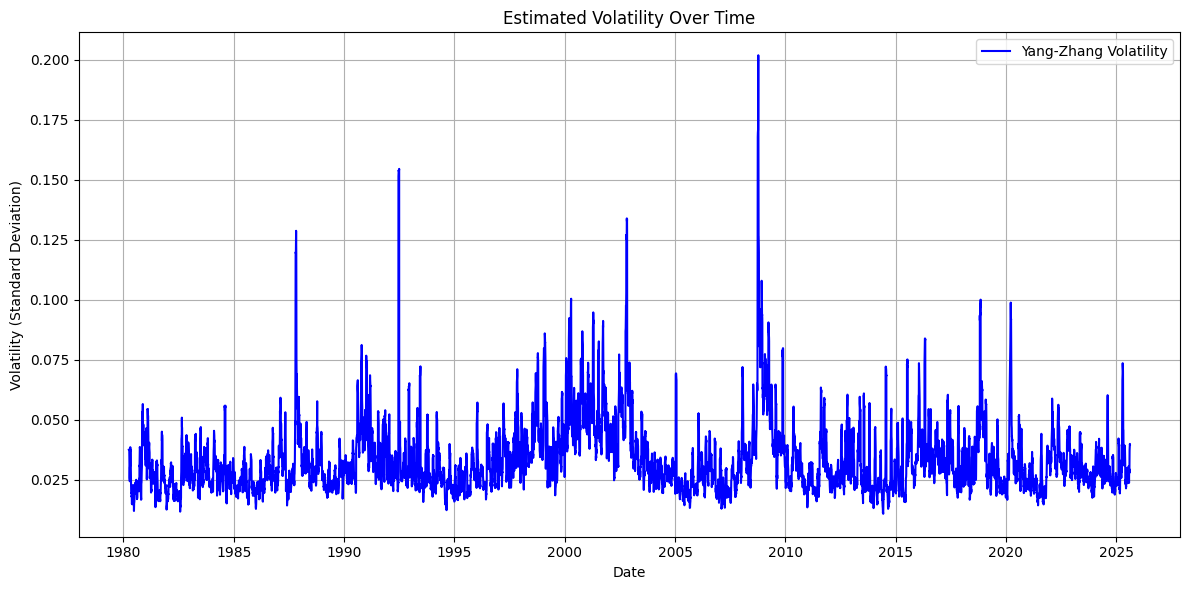

Estimated volatility Ticker
AMD    395.67439
dtype: float64


In [ ]:
print("Estimated volatility", yang_zhang_volatility(df, len(df['Open']) )* 100 * (len(df['Open'])**0.5))

**6. Present volatility**

In [ ]:
df = yf.download(tickers='AMD',start= "2025-01-01")
df.head()

/tmp/ipython-input-2214635237.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers='AMD',start= "2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMD,AMD,AMD,AMD,AMD
Date,,,,,
2025-01-02,120.629997,123.139999,119.440002,122.290001,34256200
2025-01-03,125.370003,125.559998,121.419998,121.650002,36785300
2025-01-06,129.550003,130.729996,127.360001,129.070007,48020200
2025-01-07,127.330002,131.710007,126.849998,130.509995,39220400
2025-01-08,121.839996,125.300003,120.120003,124.510002,46723100


In [ ]:
df.shape

(154, 5)

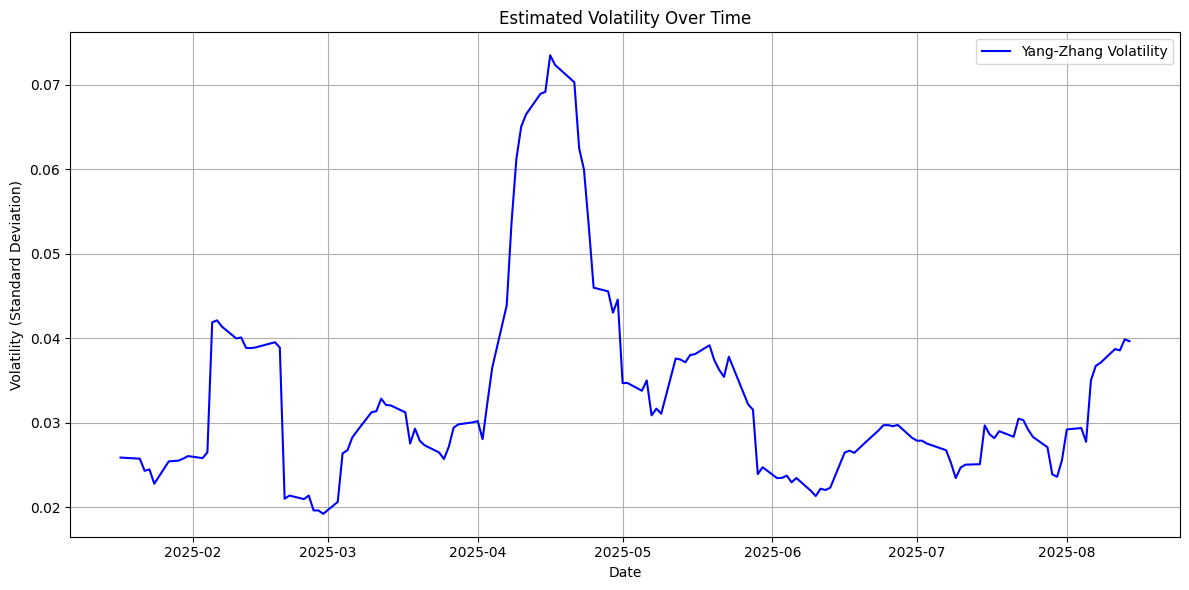

Estimated Daily volatility: Ticker
AMD    3.514334
dtype: float64


In [ ]:
print("Estimated Daily volatility:", yang_zhang_volatility(df, len(df['Open']))*100)


**7. Conclusion**

The AMD dataset starts from "2025-01-01" till present, meaning it only
captures 154 days of estimated volatility, Therefore the models estimated
volatility is approximately 3.514334 %.The stocks volalility spike between 2025-04 and 2025-05 was due to "Liberation day", emphasizing that external factors affects a stocks underlying volatility.